In [1]:
# Importaciones de librerias estándar
import pandas as pd
import numpy as np
import missingno as msg

# Importaciones relacionadas con visualización
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Configurar seaborn para visualización
sns.set()

In [2]:
# Ruta del archivo 
file_path = r'C:\Users\Guille Laion\OneDrive\Documentos\Documentos\Despegar\Base_test_BI_Planning.xlsx'

# Leer los archivo Excel 
df = pd.read_excel(file_path)

# Configurar opciones para visualización
pd.set_option('display.max_columns', 20)

In [3]:
df

,transaction_code,ViajeId,desc_producto,iata_origen,ciudad_origen,iata_destino,ciudad_destino,id_dim_tiempo_reserva,fecha_pago,producto,anticipacion,duracion,adultos,ninios,infantes
0,4801794,17540813,Vuelos,BOG,"Bogota, Colombia",MIA,"Miami, Estados Unidos",20150702,2015-07-02,Vuelos,179,9,NaN,NaN,NaN
1,4802685,15740614,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20150911,2015-09-11,Vuelos,210,15,NaN,NaN,NaN
2,4802685,15740614,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20150911,2015-09-11,Vuelos,210,15,NaN,NaN,NaN
3,4802793,16027864,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20150919,2015-09-19,Vuelos,15,15,NaN,NaN,NaN
4,4802793,16027864,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20150919,2015-09-19,Vuelos,15,15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28013,1527225701,5738217,Vuelos,MIA,"Miami, Estados Unidos",EZE,"Buenos Aires, Argentina",20160610,2016-06-10,Vuelos,2,1,3.0,0.0,0.0
28014,1530687001,5744622,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20160610,2016-06-10,Vuelos,6,5,2.0,0.0,0.0
28015,1568126201,5086945,Vuelos,LGA,"Nueva York, Estados Unidos",MIA,"Miami, Estados Unidos",20160612,2016-06-12,Vuelos,6,0,1.0,0.0,0.0
28016,1585918601,5404037,Vuelos,FCO,"Roma, Italia",MIA,"Miami, Estados Unidos",20160613,2016-06-13,Vuelos,1,5,1.0,0.0,0.0


## Análisis de la Base de Datos

In [4]:
# Revisión general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28018 entries, 0 to 28017
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_code       28018 non-null  int64         
 1   ViajeId                28018 non-null  int64         
 2   desc_producto          28018 non-null  object        
 3   iata_origen            28018 non-null  object        
 4   ciudad_origen          28018 non-null  object        
 5   iata_destino           28018 non-null  object        
 6   ciudad_destino         28018 non-null  object        
 7   id_dim_tiempo_reserva  28018 non-null  int64         
 8   fecha_pago             12789 non-null  datetime64[ns]
 9   producto               28018 non-null  object        
 10  anticipacion           28018 non-null  int64         
 11  duracion               28018 non-null  int64         
 12  adultos                28013 non-null  float64       
 13  n

<Axes: >

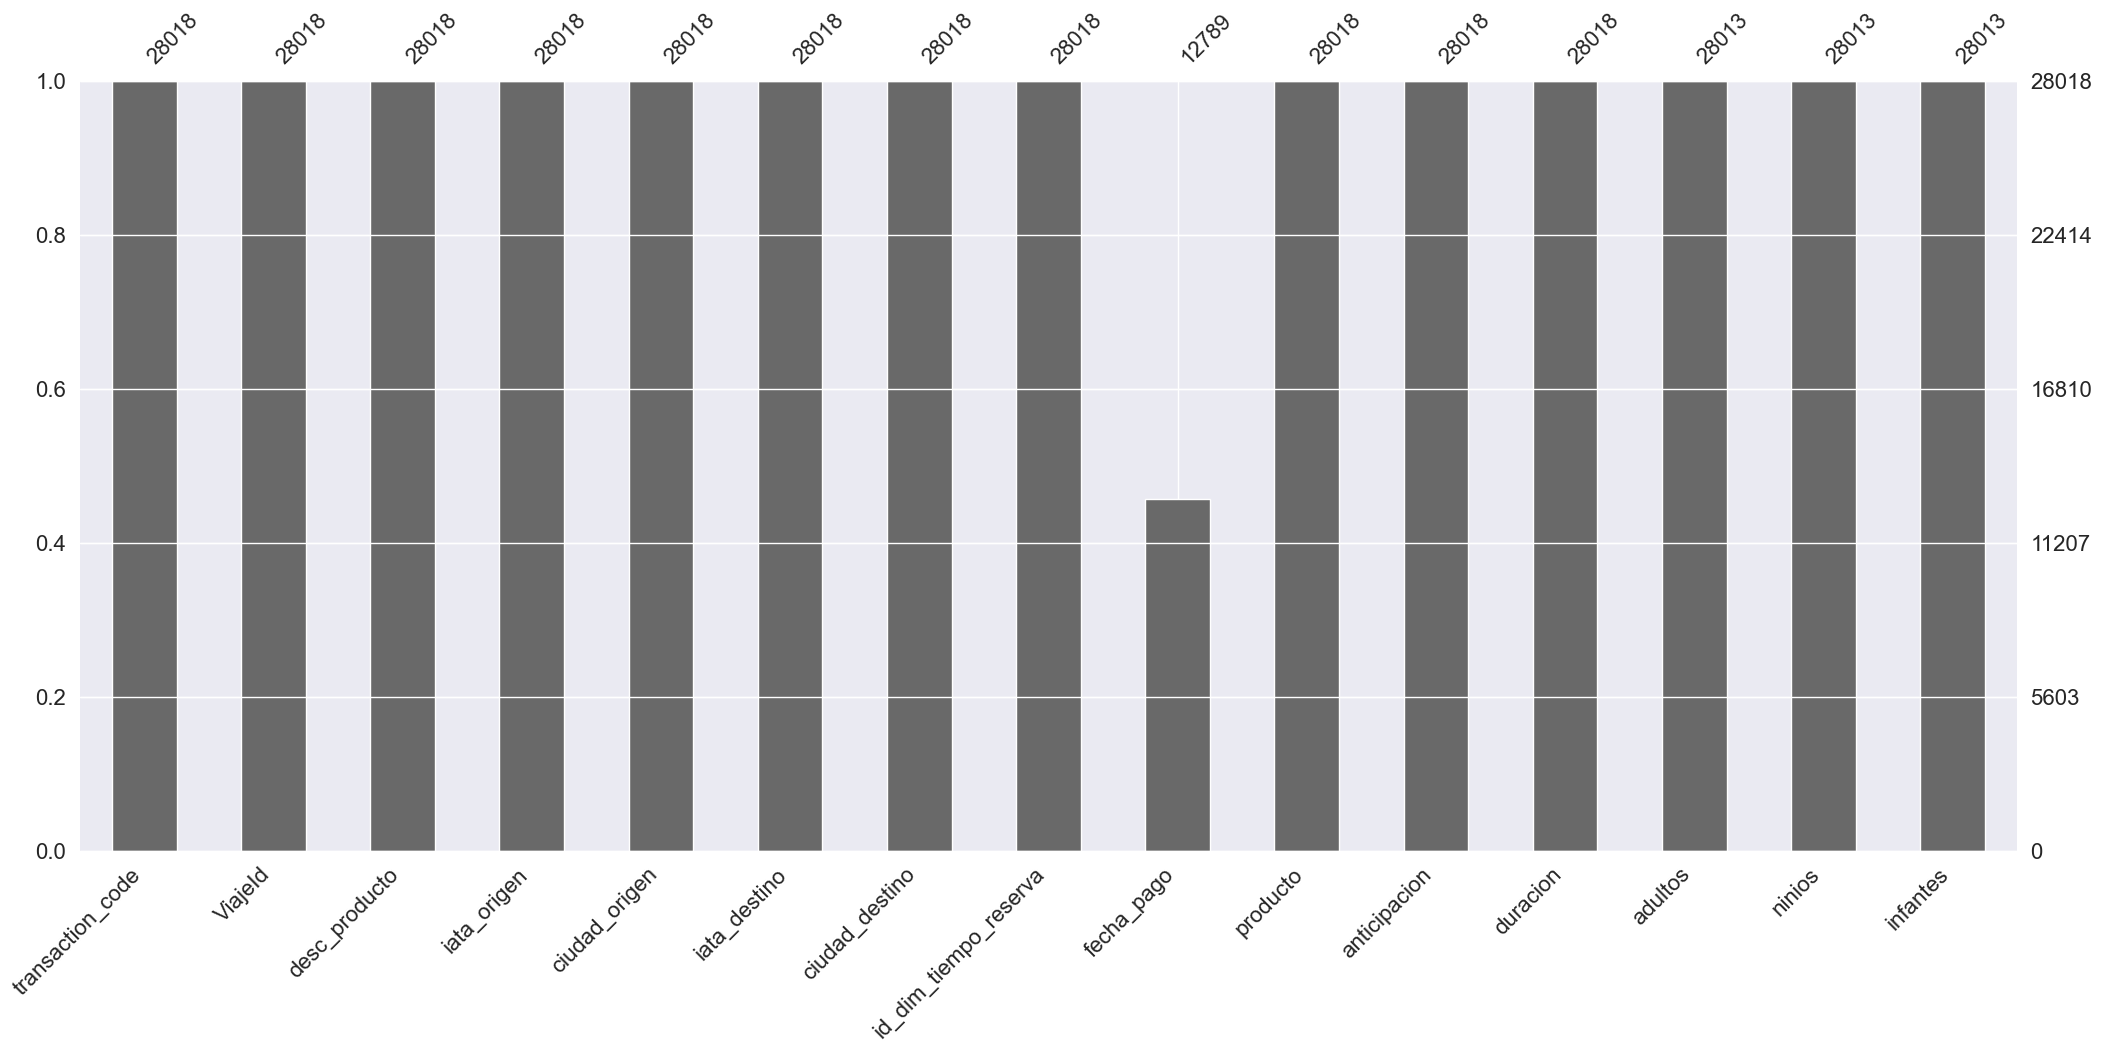

In [5]:
# Vemos si hay valores faltantes
msg.bar(df)

In [6]:
df.isna().sum()

transaction_code             0
ViajeId                      0
desc_producto                0
iata_origen                  0
ciudad_origen                0
iata_destino                 0
ciudad_destino               0
id_dim_tiempo_reserva        0
fecha_pago               15229
producto                     0
anticipacion                 0
duracion                     0
adultos                      5
ninios                       5
infantes                     5
dtype: int64

#### Imputacion de valores faltantes en columna de Fecha de Pagos

In [7]:
# Convertir la columna id_dim_tiempo_reserva a fecha
df['fecha_reserva'] = pd.to_datetime(df['id_dim_tiempo_reserva'], format='%Y%m%d')

# Convertir fecha_pago 
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], dayfirst=True, errors='coerce')

# Reemplazar fecha_pago vacía con fecha_reserva asumiendo que si no hay fecha de pago, es la misma que la de reserva !!
df['fecha_pago'] = df['fecha_pago'].fillna(df['fecha_reserva'])

# Filtrar el DataFrame excluyendo las fechas con año 2013, elimino porque no tienen sentido ni la fecha ni el producto con la descripcion del producto
df = df[df['fecha_pago'].dt.year != 2013]

In [8]:
# Ver registros donde las fechas son distintas
diferencias_f = df[df['fecha_pago'] != df['fecha_reserva']]
diferencias_f

,transaction_code,ViajeId,desc_producto,iata_origen,ciudad_origen,iata_destino,ciudad_destino,id_dim_tiempo_reserva,fecha_pago,producto,anticipacion,duracion,adultos,ninios,infantes,fecha_reserva
349,40190329,6650475,Hoteles,CUN,"Cancun, Mexico",CUN,"Cancun, Mexico",20150712,2015-07-13,Hoteles,267,6,2.0,1.0,0.0,2015-07-12
357,40193164,17937382,Hoteles,ORL,"Orlando, Estados Unidos",ORL,"Orlando, Estados Unidos",20150712,2015-07-13,Hoteles,36,2,2.0,1.0,0.0,2015-07-12
408,40223464,17075086,Hoteles,ORL,"Orlando, Estados Unidos",ORL,"Orlando, Estados Unidos",20150713,2015-07-14,Hoteles,111,12,2.0,2.0,0.0,2015-07-13
473,40288339,16342965,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20150715,2015-07-16,Vuelos,169,16,2.0,0.0,1.0,2015-07-15
477,40289486,8764584,Hoteles,ORL,"Orlando, Estados Unidos",ORL,"Orlando, Estados Unidos",20150715,2015-07-16,Hoteles,64,1,2.0,0.0,0.0,2015-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27667,973564702,7981005,Hoteles,MIA,"Miami, Estados Unidos",MIA,"Miami, Estados Unidos",20160430,2016-05-02,Hoteles,14,1,2.0,0.0,0.0,2016-04-30
27668,973728402,7981005,Hoteles,ORL,"Orlando, Estados Unidos",ORL,"Orlando, Estados Unidos",20160430,2016-05-02,Hoteles,17,2,2.0,0.0,0.0,2016-04-30
27815,1070570201,7534232,Vuelos,EZE,"Buenos Aires, Argentina",MIA,"Miami, Estados Unidos",20160515,2016-05-16,Vuelos,2,18,1.0,0.0,0.0,2016-05-15
27824,1078710102,5797824,Hoteles,MIA,"Miami, Estados Unidos",MIA,"Miami, Estados Unidos",20160516,2016-05-17,Hoteles,30,1,1.0,0.0,0.0,2016-05-16


In [9]:
# Ver cuántas filas coinciden para determinar la relevancia de la diferencia
coinciden = (df['fecha_pago'] == df['fecha_reserva']).sum()
total = len(df)

print(f"Coinciden: {coinciden} de {total} filas ({coinciden / total:.2%})")

Coinciden: 27816 de 27989 filas (99.38%)


Las fechas que no coinciden son previas a la imputacion de fecha de pago acorde a id_dim_tiempo_reserva. Entiendo que puede comprarse un producto con algun tarjeta de crédito por ejemplo, entonces la fecha de pago es diferente a la fecha de compra.

In [10]:
# Elimina la columna fecha_reserva ya que no es necesaria
df = df.drop(columns='fecha_reserva')

#### Eliminar valores Duplicados, nos quedamos con el primer registro

In [11]:
# Se oberva que hay un gran volumen de los datos con duplicados en todas sus columnas
# Cantidad de filas duplicadas exactas

r_duplicados = df.duplicated(keep=False).sum()
print(f'Duplicados exactos encontrados: {r_duplicados}')

Duplicados exactos encontrados: 13797


In [12]:
# Elimina filas duplicadas exactas y conserva solo la primera aparición
df = df.drop_duplicates(keep='first')

Sigo encontrando casos duplicados de codigos de transaccion, por lo que hago un analisis un poco más profundo.

In [13]:
# Ver casos donde un mismo transaction_code aparece más de una vez
duplicados_tc = df[df.duplicated(subset='transaction_code', keep=False)]

In [14]:
# Filtro aquellos registros que son de tipo 'Vuelos' tanto en desc_producto como en producto

vuelos_df =duplicados_tc[(duplicados_tc['desc_producto'] == 'Vuelos') & (df['producto'] == 'Vuelos')]

C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\1975308609.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vuelos_df =duplicados_tc[(duplicados_tc['desc_producto'] == 'Vuelos') & (df['producto'] == 'Vuelos')]


In [15]:
# Determino cuales son aquellos registros duplicados por transaction_code + id_dim_tiempo_reserva con anticipaciones distintas, los llamo conflictivos porque no se puede determinar cual es el correcto 
# con esta informacion

duplicados_conflictivos = vuelos_df.groupby(['transaction_code', 'id_dim_tiempo_reserva']) \
    .filter(lambda x: x['anticipacion'].nunique() > 1)

Identificar grupos de filas (en este caso, vuelos) que comparten el mismo transaction_code y id_dim_tiempo_reserva, pero que tienen más de un valor distinto en la columna anticipacion. Es decir: mismos datos, pero diferentes anticipaciones.

Desglose detallado:

1. vuelos_df.groupby(['transaction_code', 'id_dim_tiempo_reserva'])
    - Agrupa las filas de vuelos_df en bloques o grupos, donde cada grupo tiene:
    - El mismo transaction_code
    - Y el mismo id_dim_tiempo_reserva

    Ejemplo: si tenés 3 filas con transaction_code = 1234 y id_dim_tiempo_reserva = 20150701, esas tres filas estarán en un mismo grupo.

2. .filter(lambda x: x['anticipacion'].nunique() > 1)filter(...) recorre cada grupo generado antes.

    - x es un sub-dataframe, que representa un grupo completo.
    - x['anticipacion'].nunique() cuenta cuántos valores únicos de anticipación hay en ese grupo.

    Si hay más de un valor único de anticipacion, es porque existen diferencias entre las filas de ese grupo, y eso es lo que queremos detectar.
    Entonces, el lambda devuelve True solo si ese grupo tiene más de un valor de anticipacion.
    El filter mantiene solo los grupos donde eso sucede, y descarta los demás.

In [16]:
# Tome como criterio que aquellos registros que tienen Vuelos con diferentes valores en la columna anticipación es porque se reservó el vuelo y luego se modificó la fecha del vuelo 
# y por lo tanto se generó un nuevo registro con la nueva anticipación. Entonces me quedo con el que tiene menor anticipación, asumiendo que es el correcto.

vuelos_min_anticipacion = duplicados_conflictivos.sort_values('anticipacion') \
    .drop_duplicates(subset=['transaction_code', 'id_dim_tiempo_reserva'], keep='first')

In [17]:
# Con esto elimino del df original todos los registros conflictivos encontrados anteriormente
df = df[~df.index.isin(duplicados_conflictivos.index)]

In [18]:
# Vuelvo a concatenar el DataFrame limpio de vuelos con el resto del DataFrame
df = pd.concat([df, vuelos_min_anticipacion], ignore_index=True)

In [19]:
# Eliminar filas donde todos los valores de 'adultos', 'ninios' e 'infantes' son NaN dado que no aportan información relevante y 
# es no significativo si se los elimina. Es una particion muy pequeña del dataset
df = df.dropna(subset=['adultos', 'ninios', 'infantes'], how='all')


#### 1. ¿Cuáles son los destinos más populares?

In [20]:
# Previo al análisis, es necesario limpiar los nombres de el pais España que se encuentran mal codificados en el dataset.
df['ciudad_destino'] = df['ciudad_destino'].str.replace('EspaÃ±a', 'España', regex=False)
df['ciudad_origen'] = df['ciudad_origen'].str.replace('EspaÃ±a', 'España', regex=False)

In [21]:
# Separar ciudad y país del origen
df[['origen_ciudad', 'origen_pais']] = df['ciudad_origen'].str.split(', ', expand=True)

# Separar ciudad y país del destino
df[['destino_ciudad', 'destino_pais']] = df['ciudad_destino'].str.split(', ', expand=True)


##### Ciudades

In [22]:
# Entiendo que es de relevancia definir cuales son las ciudades de destino de los VUELOS que fueron comprados, por lo que se filtrar solo productos de tipo 'Vuelos' y de alli
# calcular los destinos más populares en base a cantidad de transacciones únicas, no teniendo en cuenta la cantidad de pasajeros. 

vuelos = df[df['desc_producto'] == 'Vuelos']

# Calcular destinos más populares en base a cantidad de transacciones únicas

destinos_populares = (
    vuelos.groupby('destino_ciudad')['transaction_code']
             .nunique()
             .reset_index(name='cantidad')
             .sort_values(by='cantidad', ascending=False)
             .head(10)
)

# porcentaje

total = destinos_populares ['cantidad'].sum()
destinos_populares ['porcentaje'] = (destinos_populares ['cantidad'] / total * 100).round(2)

destinos_populares

,destino_ciudad,cantidad,porcentaje
7,Miami,4513,92.71
8,Nueva York,126,2.59
1,Buenos Aires,108,2.22
2,Cancun,49,1.01
6,Madrid,20,0.41
5,Los Angeles,17,0.35
4,Las Vegas,15,0.31
3,Fort Lauderdale,13,0.27
0,Barcelona,7,0.14


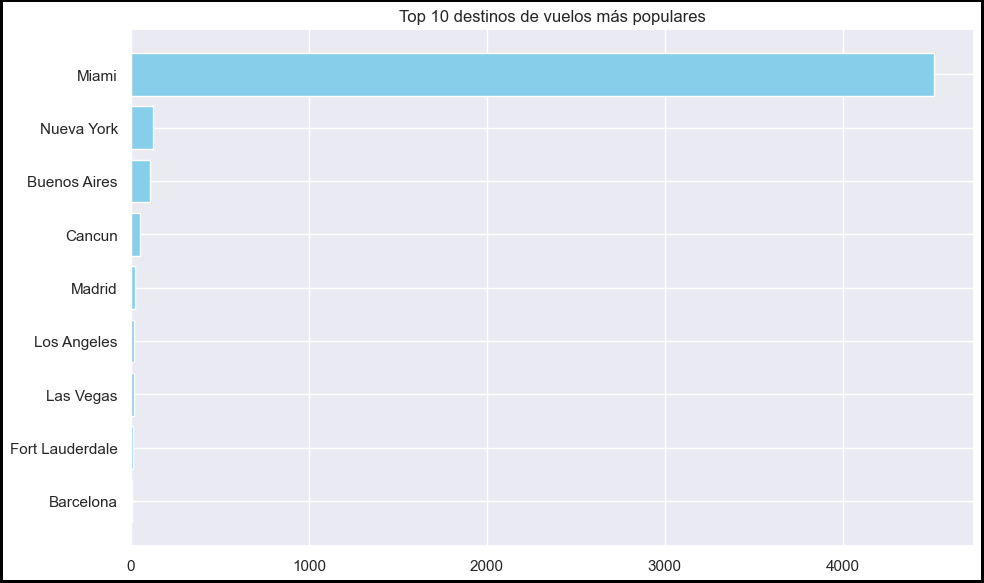

In [23]:
# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))

# Borde negro alrededor de toda la figura
fig = plt.gcf()
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(3)

plt.barh(destinos_populares['destino_ciudad'], destinos_populares['cantidad'], color='skyblue')

# Títulos y etiquetas
plt.title('Top 10 destinos de vuelos más populares')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


In [24]:
#Otra posibilidad es acorde a los IdVuelos que van a las distintas ciudades, lo que lleva a ver las siguientes ciudades con la cantidad de vuelos dirigidos hacia ellas:


# Calcular destinos más populares en base a los ViajeId
destinos_populares_iv = (
    vuelos.groupby('destino_ciudad')['ViajeId']
      .nunique()
      .reset_index(name='cantidad')
      .sort_values(by='cantidad', ascending=False)
      .head(10)
)

# Porcentaje
total = destinos_populares_iv ['cantidad'].sum()
destinos_populares_iv ['porcentaje'] = (destinos_populares_iv ['cantidad'] / total * 100).round(2)

destinos_populares_iv

,destino_ciudad,cantidad,porcentaje
7,Miami,4039,93.17
8,Nueva York,114,2.63
1,Buenos Aires,84,1.94
2,Cancun,33,0.76
6,Madrid,19,0.44
5,Los Angeles,15,0.35
4,Las Vegas,15,0.35
3,Fort Lauderdale,9,0.21
0,Barcelona,7,0.16


In [25]:
# Calcular origenes más populares en base a cantidad de transacciones únicas

origen_populares = (
    vuelos.groupby('origen_ciudad')['transaction_code']
             .nunique()
             .reset_index(name='cantidad')
             .sort_values(by='cantidad', ascending=False)
             .head(10)
)

# porcentaje

total = origen_populares ['cantidad'].sum()
origen_populares ['porcentaje'] = (origen_populares ['cantidad'] / total * 100).round(2)

origen_populares

,origen_ciudad,cantidad,porcentaje
6,Buenos Aires,3617,78.68
16,Cordoba,354,7.70
51,Rosario,173,3.76
0,Asuncion,123,2.68
29,Mendoza,84,1.83
35,Nueva York,82,1.78
57,San Miguel De Tucuman,51,1.11
30,Miami,48,1.04
21,Foz De Iguazu,36,0.78
52,Salta,29,0.63


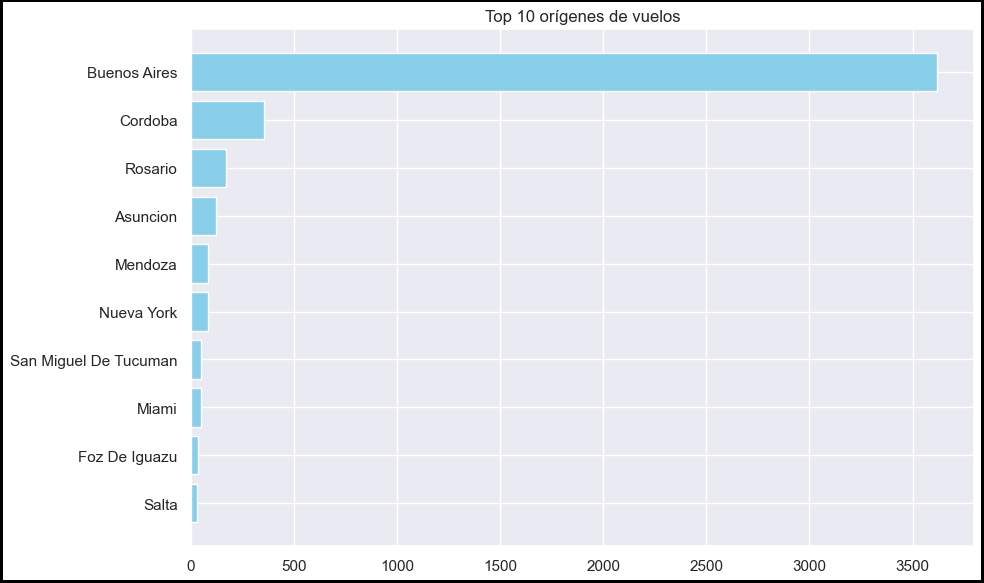

In [26]:
plt.figure(figsize=(10, 6))

# Borde negro alrededor de toda la figura
fig = plt.gcf()
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(3)

# Gráfico
plt.barh(origen_populares['origen_ciudad'], origen_populares['cantidad'], color='skyblue')

# Títulos y etiquetas
plt.title('Top 10 orígenes de vuelos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Paises

In [27]:
# Otra posibilidad es acorde a los paises de destino de las transaction_code, lo que lleva a ver los siguientes paises con la cantidad compras de vuelos dirigidos hacia ellos:

destinos_populares_paises = (
    vuelos.groupby('destino_pais')['transaction_code']
      .nunique()
      .reset_index(name='cantidad')
      .sort_values(by='cantidad', ascending=False)
      .head(10)
)
# Porcentaje
total = destinos_populares_paises ['cantidad'].sum()
destinos_populares_paises ['porcentaje'] = (destinos_populares_paises ['cantidad'] / total * 100).round(2)

destinos_populares_paises

,destino_pais,cantidad,porcentaje
2,Estados Unidos,4684,96.22
0,Argentina,108,2.22
3,Mexico,49,1.01
1,España,27,0.55


In [28]:
origen_populares_paises = (
    vuelos.groupby('origen_pais')['transaction_code']
      .nunique()
      .reset_index(name='cantidad')
      .sort_values(by='cantidad', ascending=False)
      .head(10)
)
# Porcentaje
total = origen_populares_paises ['cantidad'].sum()
origen_populares_paises ['porcentaje'] = (origen_populares_paises ['cantidad'] / total * 100).round(2)

origen_populares_paises

,origen_pais,cantidad,porcentaje
1,Argentina,4404,90.86
10,Estados Unidos,180,3.71
16,Paraguay,123,2.54
4,Brasil,68,1.40
14,Mexico,22,0.45
3,Bolivia,15,0.31
6,Chile,15,0.31
7,Colombia,7,0.14
20,Uruguay,7,0.14
19,Republica Dominicana,6,0.12


La conclusion de esta primera pregunta, lleva a que el destino mas popular para viajar en avion es Estados Unidos, dentro del cual podemos diferenciar diferentes ciudades, destacando a Miami, Nueva York, Los Angeles, Las Vegas y Fort Lauderdale como principales destinos.

Por otro lado, el país con mayor cantidad de orgenes de los vuelos es Argentina, por lo que se ve un gran volumen de sus usuarios en el pais.

En este punto se podria determinar cual es el destino más popular por aeropuerto, pais, ciudad,mes , por año, ver su evolucion mensual/anual. Ver la cantidad de pasajeros que van para cada destino en vez de solo determinar cual es la cantidad de transacciones que se hicieron hacia ese destino o de viajes que van hacia esos destinos.


Se puede evaluar en que fecha se van a utilizar los productos comprados para saber las estacionalidades de los diferentes productos. Actualmente si bien no se tienen las fechas de los viajes, de cuando se van a usar los autos, cruceros y demas, si se tiene la anticipacion de los mismos, por lo que voy a sacar por adicion las fechas estimativas.

In [29]:
# Sumamos días de anticipacion a la fecha de pago para calcular la fecha uso del producto, aca podria hacerlo solo para autos, viajes, cruceros, hoteles, entre otros.

# Tomo como ejemplo solo los conceptos de vuelos.
vuelos['fecha_viaje'] = vuelos['fecha_pago'] + pd.to_timedelta(vuelos['anticipacion'], unit='D')

C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\3096876593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['fecha_viaje'] = vuelos['fecha_pago'] + pd.to_timedelta(vuelos['anticipacion'], unit='D')


In [30]:
# Función para clasificar la estación
def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Otoño'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Primavera'

# Crear la columna 'estacion'
vuelos['estacion'] = vuelos['fecha_viaje'].apply(obtener_estacion)

# Contar cantidad de viajes por estación
viajes_por_estacion = vuelos['estacion'].value_counts().reset_index()
viajes_por_estacion.columns = ['Estación', 'Cantidad']

# también en porcentaje
viajes_por_estacion['Porcentaje'] = (viajes_por_estacion['Cantidad'] / viajes_por_estacion['Cantidad'].sum() * 100).round(2)

viajes_por_estacion


C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\2769138625.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['estacion'] = vuelos['fecha_viaje'].apply(obtener_estacion)


,Estación,Cantidad,Porcentaje
0,Otoño,1933,39.55
1,Verano,1272,26.03
2,Primavera,1183,24.21
3,Invierno,499,10.21


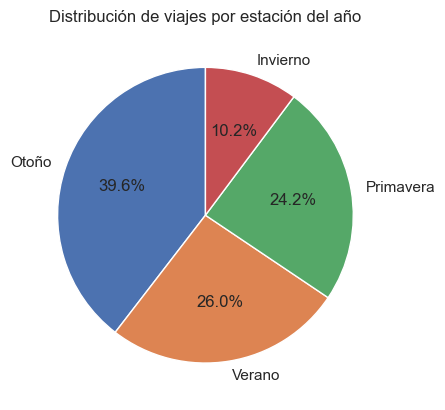

In [31]:
plt.pie(
    viajes_por_estacion['Cantidad'],
    labels=viajes_por_estacion['Estación'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución de viajes por estación del año')
plt.show()

C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\1765146027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['mes_compra'] = vuelos['fecha_pago'].dt.month
C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\1765146027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['anio_compra'] = vuelos['fecha_pago'].dt.year


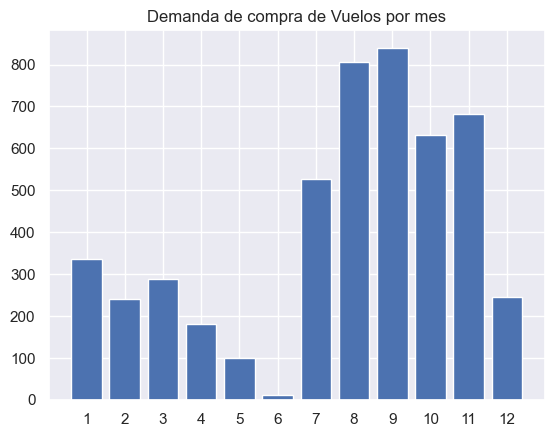

In [32]:
# Extraer mes y año de la fecha de pago
vuelos['mes_compra'] = vuelos['fecha_pago'].dt.month
vuelos['anio_compra'] = vuelos['fecha_pago'].dt.year

# Agrupar por mes
compras_por_mes = vuelos.groupby('mes_compra').size().reset_index(name='cantidad')

# Ordenar meses de 1 a 12
compras_por_mes = compras_por_mes.sort_values('mes_compra')

# Gráfico
plt.bar(compras_por_mes['mes_compra'], compras_por_mes['cantidad'])
plt.xticks(range(1, 13))
plt.title('Demanda de compra de Vuelos por mes')
plt.show()


C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\1501541803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['dia_semana_compra'] = vuelos['fecha_pago'].dt.dayofweek
C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\1501541803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['dia_semana_compra'] = vuelos['dia_semana_compra'].map(dias)


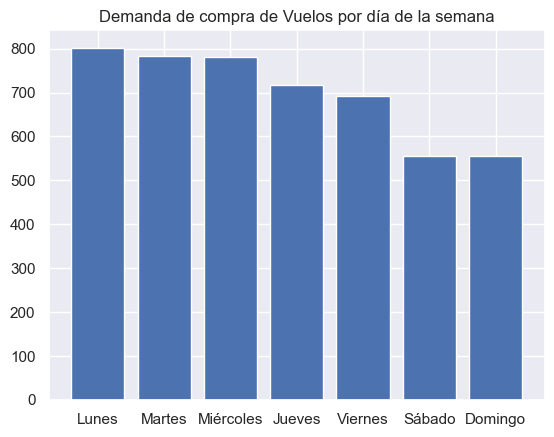

In [33]:
# Día de la semana
vuelos['dia_semana_compra'] = vuelos['fecha_pago'].dt.dayofweek

# Mapeo de nombres
dias = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
vuelos['dia_semana_compra'] = vuelos['dia_semana_compra'].map(dias)

# Agrupar
compras_por_dia = vuelos['dia_semana_compra'].value_counts().reindex(dias.values())

# Gráfico
plt.bar(compras_por_dia.index, compras_por_dia.values)
plt.title('Demanda de compra de Vuelos por día de la semana')
plt.show()


#### 2. ¿Cuáles son los productos más populares?

In [34]:
# Calcular cantidad de transacciones únicas por producto
productos_populares = (
    df.groupby('desc_producto')['transaction_code']
      .nunique()
      .reset_index(name='cantidad')
      .sort_values(by='cantidad', ascending=False)
)

# Agregar columna de porcentaje
total = productos_populares['cantidad'].sum()
productos_populares['porcentaje'] = (productos_populares['cantidad'] / total * 100).round(2)


productos_populares


,desc_producto,cantidad,porcentaje
1,Autos,5459,25.92
5,Hoteles,5325,25.28
8,Vuelos,4868,23.11
3,Disney,2004,9.52
7,Universal,1809,8.59
4,Excursiones,727,3.45
0,Asistencia al viajero,473,2.25
2,Cruceros,373,1.77
6,Traslados,23,0.11


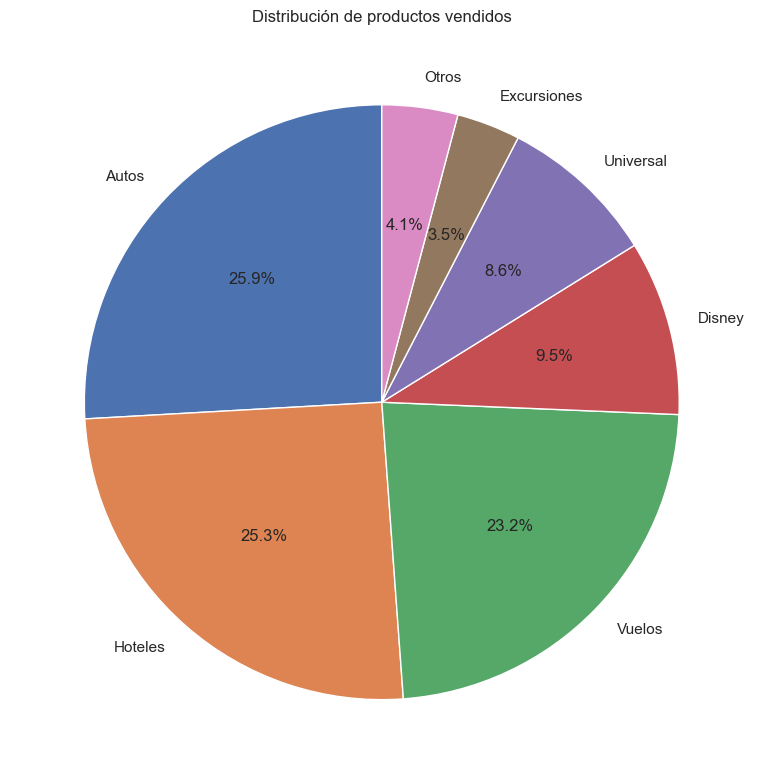

In [35]:
# Calcular la distribución de productos
productos = df['desc_producto'].value_counts()
total = productos.sum()

# Calcular los porcentajes
porcentajes = productos / total * 100

# Separar los que tienen menos del 3%
productos_mayores = productos[porcentajes >= 3]
otros = productos[porcentajes < 3].sum()

# Agregar la categoría "Otros"
productos_final = productos_mayores.copy()
productos_final['Otros'] = otros

# Graficar
productos_final.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 8)
)
plt.title('Distribución de productos vendidos')
plt.ylabel('')
plt.tight_layout()
plt.show()


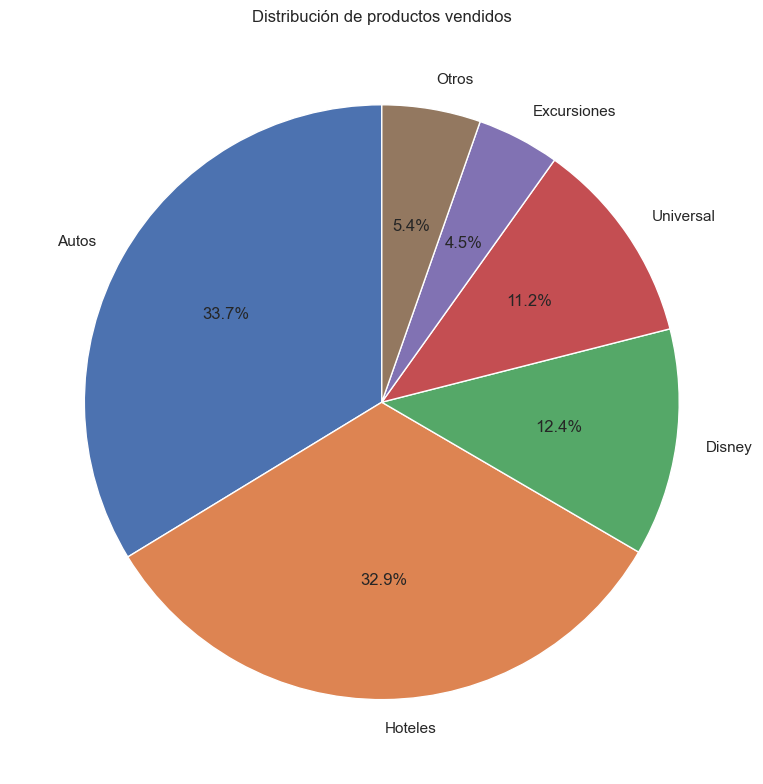

In [36]:
# excluir 'vuelos' del gráfico de distribución de productos
df_filtrado = df[df['desc_producto'] != 'Vuelos']


productos2 = df_filtrado['desc_producto'].value_counts()
total = productos2.sum()

# Calcular los porcentajes
porcentajes = productos2 / total * 100

# Separar los que tienen menos del 3%
productos_mayores = productos2[porcentajes >= 3]
otros = productos2[porcentajes < 3].sum()

# Agregar la categoría "Otros"
productos_final = productos_mayores.copy()
productos_final['Otros'] = otros

# Graficar
productos_final.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 8)
)
plt.title('Distribución de productos vendidos')
plt.ylabel('')
plt.tight_layout()
plt.show()

Podemos ver que tiene una gran variedad de productos que ofrece la empresa, pero se destaca por la venta de alquileres de autos, despues de Hoteles y en tercer nivel Vuelos, a partir de alli podemos agrupar como productos de entretenimiento (Disney, Universal y Excusiones) como un cuarto grupo, y en mucho menor medida a las Asistencias al Viajero, cruceros y traslados.

Otra opcion podria ser viendo los combos de productos que compran por Carrito o Paquetes.

Ver por Origen o por Destino como es la composicion.

#### 3. ¿Cuántos productos se compran en promedio por destino?

In [37]:
# Campo de cantidad de personas por transacción

# Crear columna 'total_personas'
culumnas_relevantes = ['destino_pais', 'destino_ciudad','transaction_code', 'desc_producto', 'adultos', 'ninios', 'infantes']

df2 = df[culumnas_relevantes].copy()

df2['total_personas'] = df2['adultos'] + df2['ninios'] + df2['infantes']

# Agrupar por producto y destino y despues se hace promedio de personas por transacción

productos_promedio_personas = (df2.groupby(['desc_producto','destino_ciudad']).agg(total_personas=('total_personas', 'sum'), transacciones_unicas=('transaction_code', 'nunique')).reset_index())

productos_promedio_personas['promedio_personas'] = (productos_promedio_personas['total_personas'] / productos_promedio_personas['transacciones_unicas']).round(2)

# promedio mensual
productos_promedio_personas['promedio_mensual_personas'] = (productos_promedio_personas['total_personas'] / 12).round(2)

# Ordenar por producto 
productos_promedio_personas = productos_promedio_personas.sort_values(by=['desc_producto', 'promedio_personas'], ascending=[True, False])

productos_promedio_personas

,desc_producto,destino_ciudad,total_personas,transacciones_unicas,promedio_personas,promedio_mensual_personas
0,Asistencia al viajero,Barcelona,6.0,3,2.00,0.50
5,Asistencia al viajero,Miami,553.0,311,1.78,46.08
2,Asistencia al viajero,Fort Lauderdale,23.0,13,1.77,1.92
8,Asistencia al viajero,Orlando,123.0,80,1.54,10.25
6,Asistencia al viajero,Miami Beach,63.0,50,1.26,5.25
7,Asistencia al viajero,Nueva York,9.0,8,1.12,0.75
1,Asistencia al viajero,Cancun,3.0,3,1.00,0.25
3,Asistencia al viajero,Las Vegas,3.0,3,1.00,0.25
4,Asistencia al viajero,Los Angeles,2.0,2,1.00,0.17
9,Autos,Barcelona,1.0,1,1.00,0.08


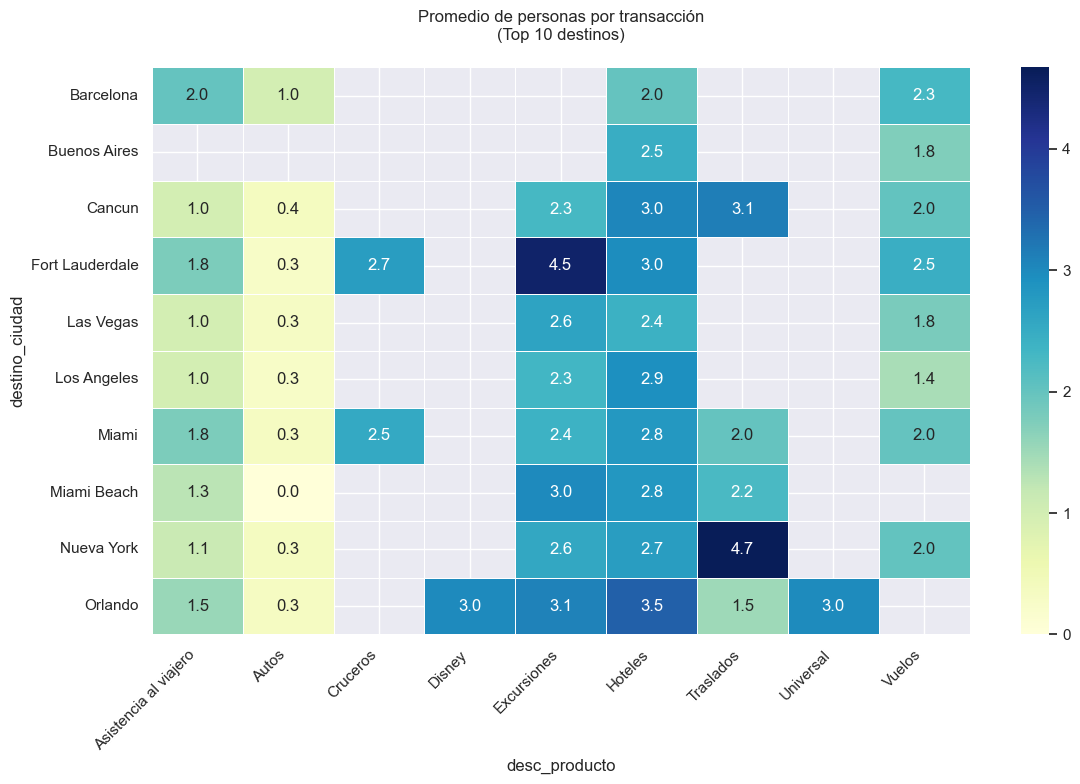

In [38]:
# Seleccionar top 10 destinos por producto
top_destinos = (productos_promedio_personas
               .groupby('destino_ciudad')['total_personas']
               .sum()
               .nlargest(10)
               .index)

data_heatmap = productos_promedio_personas[
    productos_promedio_personas['destino_ciudad'].isin(top_destinos)
].pivot(index='destino_ciudad', columns='desc_producto', values='promedio_personas')

plt.figure(figsize=(12, 8))
sns.heatmap(
    data_heatmap, 
    annot=True, 
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=.5
)
plt.title('Promedio de personas por transacción\n(Top 10 destinos)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Personas promedio por transacción'}, ylabel='desc_producto'>

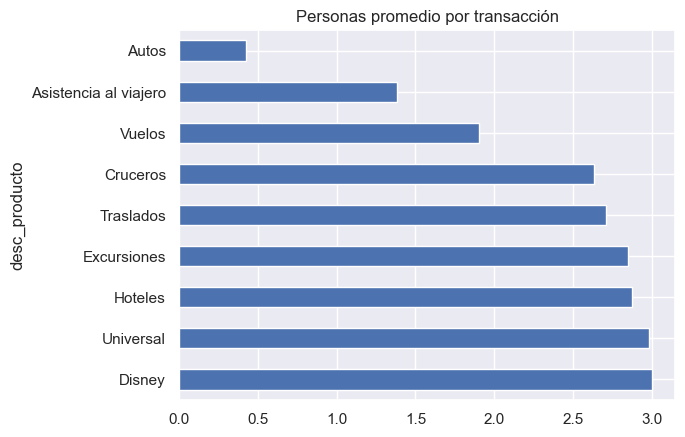

In [39]:
# otra forma de visualizarlo
(productos_promedio_personas
 .groupby('desc_producto')['promedio_personas']
 .mean()
 .sort_values(ascending=False)
 .plot(kind='barh', title='Personas promedio por transacción'))

Puede ser productos por categoria/descripcion del mismo, puede ser mensual, por pasajeros/usurios, por transaccion sin tener en cuenta el total de personas que hay en ella.

#### 4. ¿Cómo es el tipo de productos comprados según tipo de viajeros?

In [40]:
# Agrupar por 'desc_producto' y sumar las columnas relevantes
porductos_por_tv = df.groupby('desc_producto')[['adultos', 'ninios', 'infantes']].sum()

# Agrego una fila con el total general
total_general = pd.DataFrame({
    'adultos': [porductos_por_tv['adultos'].sum()],
    'ninios': [porductos_por_tv['ninios'].sum()],
    'infantes': [porductos_por_tv['infantes'].sum()]
}, index=['Total general'])

tabla_final = pd.concat([porductos_por_tv, total_general])

tabla_final

,adultos,ninios,infantes
Asistencia al viajero,785.0,0.0,0.0
Autos,1843.0,0.0,0.0
Cruceros,793.0,143.0,13.0
Disney,5057.0,949.0,1.0
Excursiones,1796.0,309.0,16.0
Hoteles,12379.0,3922.0,0.0
Traslados,63.0,7.0,0.0
Universal,4662.0,725.0,0.0
Vuelos,8463.0,1012.0,172.0
Total general,35841.0,7067.0,202.0


In [41]:
# Calcular porcentajes de tabla anterior
tabla_porcentajes = tabla_final.iloc[:-1].copy() 

for col in ['adultos', 'ninios', 'infantes']: tabla_porcentajes[col] = (tabla_porcentajes[col] / total_general[col].values[0]) * 100

# Formatear a 2 decimales
tabla_porcentajes.round(2)



,adultos,ninios,infantes
Asistencia al viajero,2.19,0.00,0.00
Autos,5.14,0.00,0.00
Cruceros,2.21,2.02,6.44
Disney,14.11,13.43,0.50
Excursiones,5.01,4.37,7.92
Hoteles,34.54,55.50,0.00
Traslados,0.18,0.10,0.00
Universal,13.01,10.26,0.00
Vuelos,23.61,14.32,85.15


In [42]:
# Crear columna tipo_grupo para clasificar en 'Familia' o 'Solo Adultos'
df2['tipo_grupo'] = df2.apply(
    lambda row: 'Familia' if (row['adultos'] > 0) and (row['ninios'] > 0 or row['infantes'] > 0) 
               else 'Solo Adultos', 
    axis=1
)

In [43]:
# Crear la tabla 
tabla = pd.crosstab(
    index=df2['desc_producto'],  
    columns=df2['tipo_grupo'],   
    margins=True,               
    margins_name="Total"        
)

tabla

tipo_grupo,Familia,Solo Adultos,Total
desc_producto,,,
Asistencia al viajero,0,473,473
Autos,0,5459,5459
Cruceros,107,266,373
Disney,703,1301,2004
Excursiones,212,516,728
Hoteles,2141,3184,5325
Traslados,5,18,23
Universal,537,1272,1809
Vuelos,856,4031,4887


In [44]:
# Crear tabla de porcentajes 
tabla_porcentaje = pd.crosstab(
    index=df2['desc_producto'],
    columns=df2['tipo_grupo'],
    normalize='index',  
    margins=True,
    margins_name="Total"
) * 100  

tabla_porcentaje = tabla_porcentaje.round(2)

tabla_porcentaje

tipo_grupo,Familia,Solo Adultos
desc_producto,,
Asistencia al viajero,0.00,100.00
Autos,0.00,100.00
Cruceros,28.69,71.31
Disney,35.08,64.92
Excursiones,29.12,70.88
Hoteles,40.21,59.79
Traslados,21.74,78.26
Universal,29.68,70.32
Vuelos,17.52,82.48


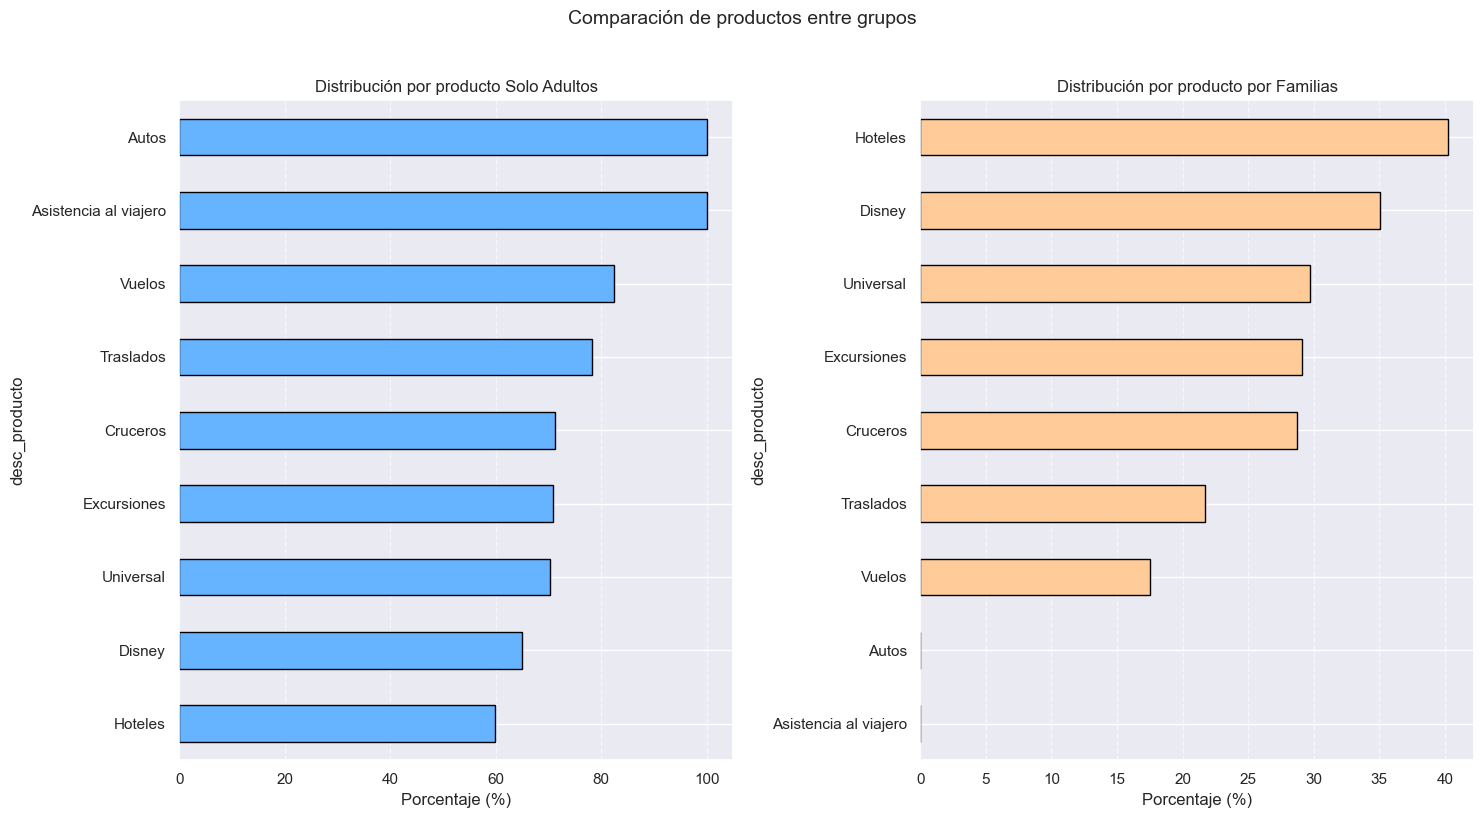

In [45]:
tabla_porcentaje = tabla_porcentaje.drop(index='Total')

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Solo Adultos
tabla_porcentaje['Solo Adultos'].sort_values().plot(
    kind='barh',
    color='#66b3ff',
    ax=ax1,
    title='Distribución por producto Solo Adultos',
    xlabel='Porcentaje (%)',
    edgecolor='black'
)
ax1.grid(axis='x', linestyle='--', alpha=0.6)

# Familias 
tabla_porcentaje['Familia'].sort_values().plot(
    kind='barh',
    color='#ffcc99',
    ax=ax2,
    title='Distribución por producto por Familias',
    xlabel='Porcentaje (%)',
    edgecolor='black'
)
ax2.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustes generales
plt.suptitle('Comparación de productos entre grupos', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Guille Laion\AppData\Local\Temp\ipykernel_24716\3548372557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vuelos['tipo_viaje'] = vuelos.apply(lambda row: 'Nacional' if row['origen_pais'] == row['destino_pais'] else 'Internacional', axis=1)


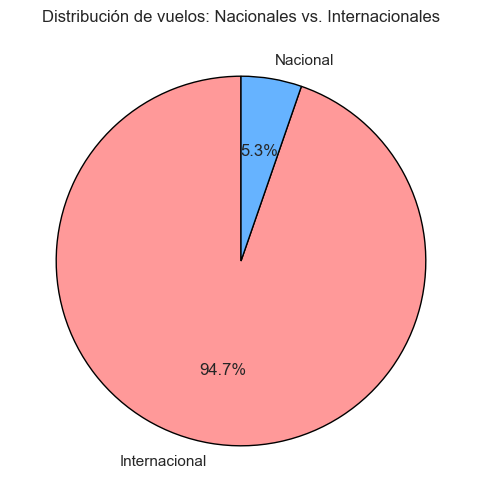

In [46]:
# Quiero determinar si los viajes que se hacen son nacionales o internacionales 

# Clasificar los vuelos que pueden llevar a ser nacionales y los internacionales
vuelos['tipo_viaje'] = vuelos.apply(lambda row: 'Nacional' if row['origen_pais'] == row['destino_pais'] else 'Internacional', axis=1)

# Contar cantidad de vuelos por tipo
conteo_viajes = vuelos['tipo_viaje'].value_counts()

# Gráfico de torta
plt.figure(figsize=(8, 6))
conteo_viajes.plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'], # Busque estos colores especialmente para que sean agradables a la vista
    labels=['Internacional','Nacional'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Distribución de vuelos: Nacionales vs. Internacionales')
plt.ylabel('')
plt.show()

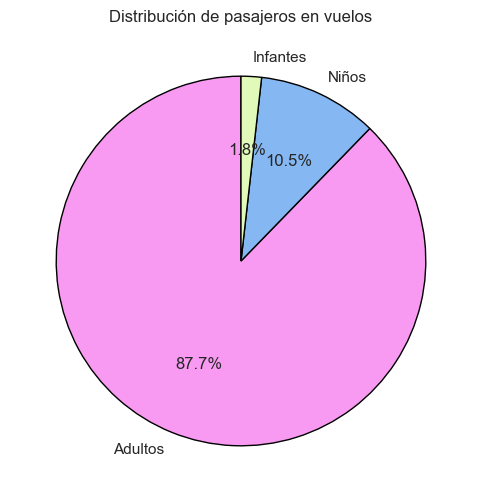

In [47]:
# Otra opcion que se podria hacer es la distribución de pasajeros (adultos, niños, infantes) en todos los vuelos

# Sumar total de pasajeros por tipo
total_pasajeros = vuelos[['adultos', 'ninios', 'infantes']].sum()

# Gráfico de torta
plt.figure(figsize=(8, 6))
total_pasajeros.plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
    colors=["#f89af1", "#85b8f2", "#e1fab9"],
    labels=['Adultos', 'Niños', 'Infantes'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Distribución de pasajeros en vuelos')
plt.ylabel('')
plt.show()

Se puede llegar a agregar descripcion de los destinos acorde a si es un lugar mas turistico, mas de trabajo, de paso, entre otras opciones.
Acorde al tiempo que permanecen o es la duracion hasta el proximo vuelo de vuelta. Tambien asociado a los criterios mencionados recien.

Tambien acorde a si realiza un viaje por crucero, si alquilan un auto todos los días que estan de viaje, son perfiles más particulares. Tienen otro tipo de turismo o actividad.

Puede llegar alguna relacion entre el tipo de actividad que van a realizar con el aeropuerto donde van a ir como destino.


#### 5. ¿Cuál es el orden de compra de productos para los destinos más populares?

No tienen una columna que indique el orden de compro, se podría pensar que acorde a orden en que aparecen en la Base es como se van comprando. Pero son iguales las fechas de pago y el valor de anticipacion.

Se podría agregar alguna columna que permita identificar como fue haciendo el proceso de compra el usuario.

#### 6. ¿Cambia el comportamiento de compra por origen?

##### Análisis de anticipación de compra y duracion promedio de cada producto por destino y origen

In [48]:
duracion_promedio = (
    df.groupby(['desc_producto', 'destino_ciudad'])['duracion']
      .mean()
      .reset_index(name='duracion_promedio')
)

duracion_promedio.round(2)


,desc_producto,destino_ciudad,duracion_promedio
0,Asistencia al viajero,Barcelona,21.67
1,Asistencia al viajero,Cancun,11.33
2,Asistencia al viajero,Fort Lauderdale,5.77
3,Asistencia al viajero,Las Vegas,2.67
4,Asistencia al viajero,Los Angeles,8.00
5,Asistencia al viajero,Miami,10.70
6,Asistencia al viajero,Miami Beach,5.20
7,Asistencia al viajero,Nueva York,5.12
8,Asistencia al viajero,Orlando,8.20
9,Autos,Barcelona,7.00


In [49]:
duracion_promedio = (
    df.groupby(['destino_ciudad'])['duracion']
      .mean()
      .reset_index(name='duracion_promedio')
)

duracion_promedio.round(2)

,destino_ciudad,duracion_promedio
0,Acapulco,3.00
1,Barcelona,6.48
2,Buenos Aires,6.95
3,Cancun,7.22
4,Fort Lauderdale,4.54
5,Las Vegas,3.99
6,Los Angeles,6.72
7,Madrid,16.83
8,Miami,10.60
9,Miami Beach,4.33


In [50]:
duracion_promedio = (
    df.groupby(['desc_producto'])['duracion']
      .mean()
      .reset_index(name='duracion_promedio')
)

duracion_promedio.round(2)

,desc_producto,duracion_promedio
0,Asistencia al viajero,9.48
1,Autos,9.07
2,Cruceros,4.92
3,Disney,0.00
4,Excursiones,0.00
5,Hoteles,4.39
6,Traslados,3.96
7,Universal,0.00
8,Vuelos,14.76


In [51]:
duracion_promedio_o = (
    df.groupby(['origen_ciudad'])['duracion']
      .mean()
      .reset_index(name='duracion_promedio')
)

duracion_promedio_o.round(2)

,origen_ciudad,duracion_promedio
0,Acapulco,3.00
1,Asuncion,22.82
2,Atlanta,9.00
3,Bahia Blanca,11.78
4,Barcelona,5.21
...,...,...
84,Ushuaia,6.67
85,Venecia,0.00
86,Viena,0.00
87,Washington,3.50


In [52]:
anticipacion_promedio = (
    df.groupby(['desc_producto', 'destino_ciudad'])['anticipacion']
      .mean()
      .reset_index(name='anticipacion_promedio')
)

anticipacion_promedio.round(2)

,desc_producto,destino_ciudad,anticipacion_promedio
0,Asistencia al viajero,Barcelona,23.33
1,Asistencia al viajero,Cancun,203.67
2,Asistencia al viajero,Fort Lauderdale,67.92
3,Asistencia al viajero,Las Vegas,33.33
4,Asistencia al viajero,Los Angeles,29.50
5,Asistencia al viajero,Miami,80.86
6,Asistencia al viajero,Miami Beach,66.14
7,Asistencia al viajero,Nueva York,120.62
8,Asistencia al viajero,Orlando,107.50
9,Autos,Barcelona,5.00


In [53]:
anticipacion_promedio = (
    df.groupby(['destino_ciudad'])['anticipacion']
      .mean()
      .reset_index(name='anticipacion_promedio')
)

anticipacion_promedio.round(2)

,destino_ciudad,anticipacion_promedio
0,Acapulco,0.00
1,Barcelona,59.45
2,Buenos Aires,23.78
3,Cancun,79.18
4,Fort Lauderdale,64.38
5,Las Vegas,64.94
6,Los Angeles,56.53
7,Madrid,63.03
8,Miami,64.58
9,Miami Beach,67.04


In [54]:
anticipacion_promedio_o = (
    df.groupby(['origen_ciudad'])['anticipacion']
      .mean()
      .reset_index(name='anticipacion_promedio')
)

anticipacion_promedio_o.round(2)

,origen_ciudad,anticipacion_promedio
0,Acapulco,0.00
1,Asuncion,77.28
2,Atlanta,85.00
3,Bahia Blanca,80.56
4,Barcelona,60.51
...,...,...
84,Ushuaia,74.33
85,Venecia,46.00
86,Viena,97.00
87,Washington,49.50


Tras el análisis realizado, se identifican varios puntos a revisar y posibles mejoras:

1. Asignación de hora de pago

    - Es necesario determinar la causa por la cual en el sistema no se asigna la hora de pago en algunos registros, ya que estos constituyen los valores faltantes.

2. Repetición de datos

    - Analizar el motivo por el cual existen repeticiones exactas de datos en todas las columnas.

    - Evaluar agrupar por tipo de pasajero (adulto, niño, infante) en una columna de totales y, a partir de allí, desagregar cada participante de la compra.

    - Evitar que existan dos filas con el mismo código de transacción si comparten origen, destino, tiempo de anticipación y permanencia.

3. Datos de autos

    - Mejorar la recolección de información para productos de autos, ya que en gran parte de los casos no se indica la cantidad de adultos (considerando que solo adultos pueden adquirir este producto).

4. Secuencia de compra

    - Incorporar una columna que indique el orden en que el usuario adquirió los productos (por ejemplo: vuelo → hotel → auto → entretenimiento).

    - Esto permitiría ofrecer mejores paquetes y optimizar la experiencia de compra.

5. Forma de pago

    - Incluir información sobre si el pago se realizó en un único acto o mediante tarjeta de crédito, y en este último caso, en cuántas cuotas.



In [55]:
# df.to_excel("Base_test_BI_Planning_Clean.xlsx", index=False)